In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy 
import ta
import sys
import os
from PIL import Image
from sklearn.model_selection import train_test_split

sys.path.insert(0,os.path.join("C:/",os.sep,"Users","jrebe","Desktop","IA EN TRADING ALGORÍTMICO", "codigo"))
sys.path.insert(0,os.path.join("C:/",os.sep,"Users","jrebe","Desktop","IA EN TRADING ALGORÍTMICO", "codigo","zigzag"))
import zigzag_pips as zg



## GENERAMOS VENTANAS FILTRADAS

In [2]:
from generadores import generarVentanasFiltradas

divisas = ["EUR_USD","GBP_USD"]
campo = "15min"
paths_data = [os.path.join("C:/",os.sep,"Users","jrebe","Desktop","IA EN TRADING ALGORÍTMICO",
                           "datos_forex","datos_crudos",divisa,"".join([divisa,"_",campo,".csv"])) for divisa in divisas]
n_semanas, n_vent_semana= 10, 200
len_ventana_total, len_ventana_presente = 200, 80
ymax, ymin = 0.01, -0.002
a_max, a_min = 0.01, 0.005
ventanas_presentes, ventanas_futuras = generarVentanasFiltradas(paths_data,
                                                                n_semanas = n_semanas, n_vent_semana = n_vent_semana,
                                                                len_ventana_total = len_ventana_total, len_ventana_presente = len_ventana_presente,
                                                                ymax = ymax, ymin = ymin, a_max = a_max, a_min = a_min,
                                                                price = "B.C")

----------------EMPEZAMOS----------------


 ****** DIVISA 1******

Cargando y preparando datos
Hecho

Semana 1
Semana 2
Semana 3
Semana 4
Semana 5
Semana 6
Semana 7
Semana 8
Semana 9
Semana 10


 ****** DIVISA 2******

Cargando y preparando datos
Hecho

Semana 1
Semana 2
Semana 3
Semana 4
Semana 5
Semana 6
Semana 7
Semana 8
Semana 9
Semana 10


## PLOTS DE VENTANAS FILTRADAS

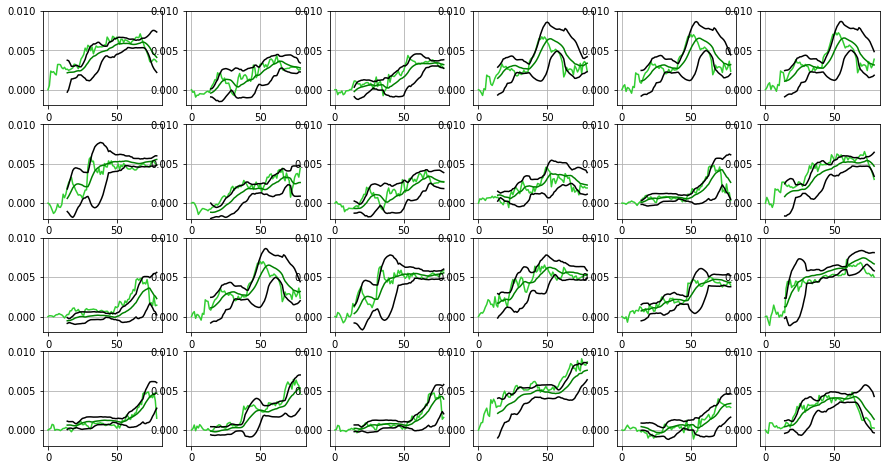

In [3]:
# series = series_presentes
ventanas = ventanas_presentes
nrow, ncol = 4,6
ventanas_save = []
fig, ax = plt.subplots(nrow,ncol, figsize = (15,8))
for i in range(nrow):
    for j in range(ncol):
        ventana = ventanas[random.randint(0,len(ventanas)-1)]
        ventanas_save.append(ventana)
        ax[i,j].plot(ventana.loc[:,"B.C"], color = "limegreen")
        ax[i,j].plot(ventana["hband"], color = "black")
        ax[i,j].plot(ventana["lband"], color = "black")
        ax[i,j].plot(ventana["wma"], color = "green")
        ax[i,j].set_ylim(ymin,ymax)
        ax[i,j].grid()

## GENERAMOS Y GUARDAMOS IMAGENES CON SUS ETIQUETAS

In [4]:
from generadores import etiquetarVentanas, generarImagenes

directory = os.path.join("experimento1","images")

print("Etiquetando")
y = etiquetarVentanas(ventanas_presentes, ventanas_futuras, thr_fut = 0.003, save_path = directory )
print("Hecho")
print("Generando y guardando Imagenes")
generarImagenes(ventanas_presentes, ymax, ymin, directory = directory)

Etiquetando


TypeError: etiquetarVentanas() got an unexpected keyword argument 'save_path'

## CARGAMOS LAS IMÁGENES EN FORMA DE ARRAY 

In [62]:
from PIL import Image

directory = os.path.join("experimento1","images")

y = np.load(file = os.path.join(directory, "etiquetas.npy"))
X = np.array(  [np.asarray(Image.open(os.path.join(directory,"".join(["im",str(i),".png"]))))/255 for i in range(len(y))]       )

## CREAMOS LA RED NEURONAL

In [67]:
import sys
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

def create_model():
    
    # example of a 3-block vgg style architecture
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 400, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # example output part of the model
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=[keras.metrics.TruePositives(name = "TP"), keras.metrics.TrueNegatives(name = "TN"),
                                                                         keras.metrics.FalsePositives(name = "FP"), keras.metrics.FalseNegatives(name = "FN")])
    
    return model

model = create_model()

## ENTRENAMOS LA RED

In [ ]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.33, shuffle = True)
history = model.fit(trainX, trainY, epochs=10, batch_size=200, validation_data=(testX, testY))


In [60]:
sum(y)/len(y)

0.28433098591549294